# Лабораторная работа

## Определение энергии $\alpha$-частиц по величине их пробега в воздухе

## Теоретические сведения

Энергию альфа-частиц удобно определять по величине их пробега в веществе. Рассмотрим подробно взаимодействие заряженных частиц с веществом. Альфа-частицы при прохождении вещества чаще всего теряют энергию в результате неупругих столкновений с атомами. Этот процесс можно рассматривать как процесс непрерывного столкновения. Рассеиваемая энергия не превышает $4mE/M$. Атомные электроны можно считать свободными в силу того, что энергия налетающей частицы значительно превышает энергию связи электронов в атомах:
		\begin{equation}
		    E_e = \frac{p^2}{2m} = \frac{1}{2m}\left(\frac{Ze^2}{y^2}\cdot\frac{2y}{v}\right) = \frac{2e^4Z^2}{mv^2y^2}
		\end{equation}
		Если плотность электронов в среде $n = nZ$, то потеря энергии заряженной частицей на единице пути в результате взаимодействия с электронами в слое $2\pi y d y$ будет выражаться как:
		\begin{equation}
		    d E(y) = \frac{4\pi nZ z^2e^4}{mv^2}\frac{d y}{y}
		\end{equation}
		Преобразуя выражение и вводя обозначение $\bar{I}$:
		\begin{equation}
		    \ln\frac{E_{max}}{E_{min}} = \ln\frac{2mv^2}{\bar{I}}
		\end{equation}
		\begin{equation}
		    \left(\frac{d E}{d x}\right) \simeq 2\pi\frac{e^4z^2}{mv^2}nZ\ln\frac{2mv^2}{\bar{I}}
		\end{equation}
		Величину $\frac{d E}{d x}$ называют тормозную способностью вещества.
		Зависимость тормозной способности от пути называется кривой Брэгга.  Две такие кривые для движения $^{210}Po$ и  $^{214}Po$ показаны на рисунке. Характерный подъем называется пиком Брэгга (рис. 1)
		

![Схема экспериментальной установки](pic1.png)

## Экспериментальная установка

В работе длину пробега будем измерять тремя разными способами:
1. С помощью счетчика Гейгера
2. С помощью сцинтилляционного счетчика
3. С помощью ионизационной камеры

Схемы установок изображены на рисунках 3-5:

![Схема экспериментальной установки](pic3.png)

![Схема экспериментальной установки](pic4.png)

![Схема экспериментальной установки](pic5.png)

## Ход работы

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 1. Исследование пробега $\alpha$-частиц с помощью счетчика Гейгера

1\. Подготавливаем установку. Проводим измерение зависимости скорости счета от расстояния между источником и счетчиком, записываем результаты в таблицу.

In [2]:
table1 = pd.read_csv('''C:\\Users\\Nikeyson-PC\\Desktop\\Laba4_1\\exp1.csv''', sep=';')

In [3]:
table1

,height,N,time
0,2,430,"30,266"
1,"2,5",425,"30,263"
2,3,418,"30,137"
3,"3,5",463,"30,332"
4,4,451,"31,121"
5,"4,5",467,"31,579"
6,5,481,"31,341"
7,"5,5",460,"30,414"
8,6,427,"30,93"
9,"6,5",462,"31,898"


In [4]:
x1 = np.array(table1.iloc[:, 0].str.replace(',', '.').astype(float))
y1 = np.array(table1.iloc[:, 1])
z1 = np.array(table1.iloc[:, 2].str.replace(',', '.').astype(float))
#Нормируем по времени
y1 = y1/z1
#Положение ноль равно 10мм от источника
x1 = x1 + 10

2\. Строим график, по нему определим среднюю и экстраполированную длину пробега

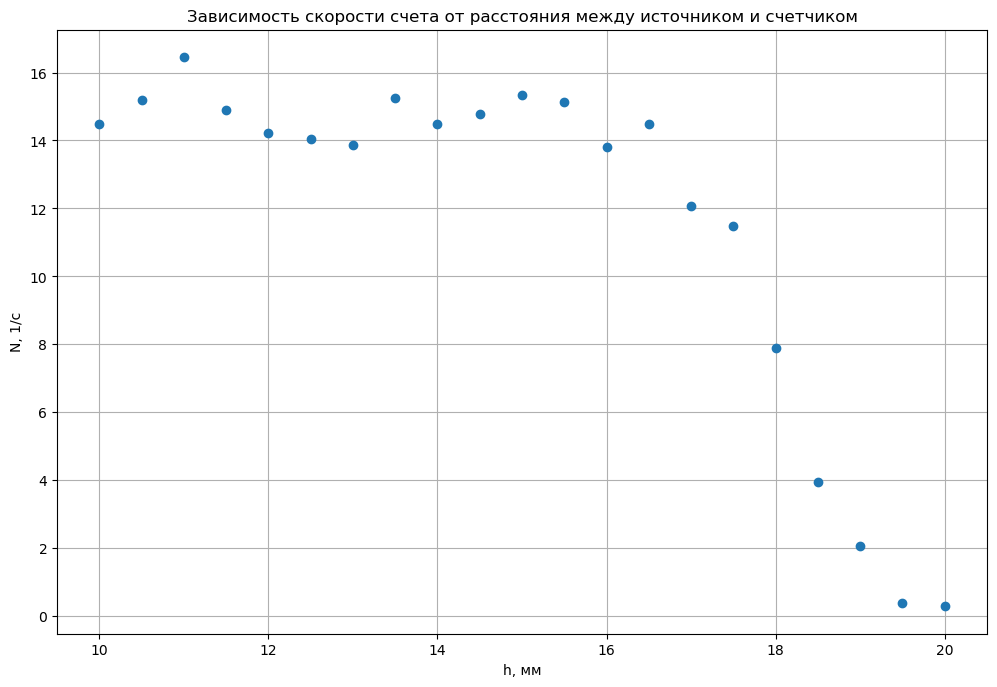

In [5]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x1, y1, 'o' ,label= "Всё")
ax1.grid(True)
plt.xlabel("h, мм")
plt.ylabel("N, 1/с")
plt.title("Зависимость скорости счета от расстояния между источником и счетчиком")
plt.show()

In [6]:
#Берем точки, где наблюдается спад, экстраполируем по ним.
x11 = x1[9:-5]
y11 = y1[9:-5]
a, b = np.polyfit(x11,y11,1)
s = 0
for i in range(len(y11)):
    s+= (abs(y11[i] - (a*x11[i]) - b))**2
s = (s/len(y11))**0.5

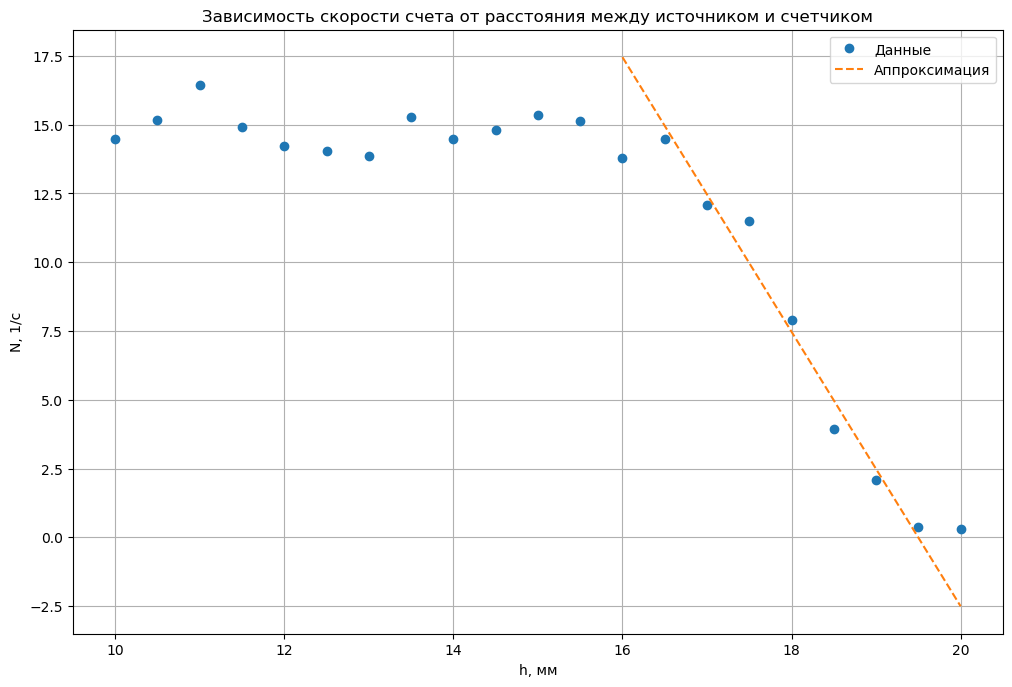

In [7]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x1, y1, 'o' ,label= "Данные")
ax1.grid(True)
ap = [i for i in range(16, 21, 1)]
p = [a*i + b for i in ap]
ax1.plot(ap, p, "--", label= "Аппроксимация")
ax1.legend()
plt.xlabel("h, мм")
plt.ylabel("N, 1/c")
plt.title("Зависимость скорости счета от расстояния между источником и счетчиком")
plt.show()

In [8]:
#Средний пробег
r1_av = ((x11[0]+x11[-1])/2)/10
r1_av1 = r1_av*0.001225
#Экстраполированный пробег
r1 = (-b/a)/10
r11 = r1*0.001225
err1 = ((0.5/10)**2 + (s/y11[0])**2)**0.5
r1_av_err  = r1_av*err1
r1_av1_err  = r1_av1*err1
r1_err = r1*err1
r11_err = r11*err1

In [9]:
print("Средний пробег: ", round(r1_av,3) , "+-", round(r1_av_err,3) , "см")
print("Средний пробег: ", round(r1_av1,4), "+-", round(r1_av1_err,4) , "г/см^2")
print("Экстраполированный пробег: ", round(r1,3) , "+-", round(r1_err,3) , "см")
print("Экстраполированный пробег: ", round(r11,4) , "+-", round(r11_err,4) , "г/см^2")

Средний пробег:  1.8 +- 0.132 см
Средний пробег:  0.0022 +- 0.0002 г/см^2
Экстраполированный пробег:  1.95 +- 0.143 см
Экстраполированный пробег:  0.0024 +- 0.0002 г/см^2


## 2. Определение пробега $\alpha$-частиц с помощью сцинтилляционного счетчика

1\. Подготовили установку к работе. Атмосферное давление: 100,6 кПа. При нем, скорость счета - 7 счетов за 100 секунд.

2\. Измерим зависимость скорости счета от давления, занесем данные в таблицу

In [10]:
table2 = pd.read_csv('''C:\\Users\\Nikeyson-PC\\Desktop\\Laba4_1\\exp2.csv''', sep=';')

In [11]:
table2

,Pressure,N
0,745,3674
1,745,3655
2,745,3718
3,720,3491
4,720,3509
5,720,3560
6,700,3418
7,700,3389
8,700,3423
9,675,3151


In [12]:
#Переводим давление из относительного к атмосфере в абсолютное, усредняем для одинаковых значений давления.
x2 = np.array(table2.iloc[:, 0])
y2 = np.array(table2.iloc[:, 1])
x21 = []
y21 = []
for i in range(0, len(x2), 3):
    x21.append(x2[i])
    y21.append((y2[i]+y2[i+1]+y2[i+2])/3)
x21 = np.array(x21)
y21 = np.array(y21)
x21 = 100600 - x21*133.322
y21 = y21/10

3\. Строим график, по нему определим среднюю и экстраполированную длину пробега

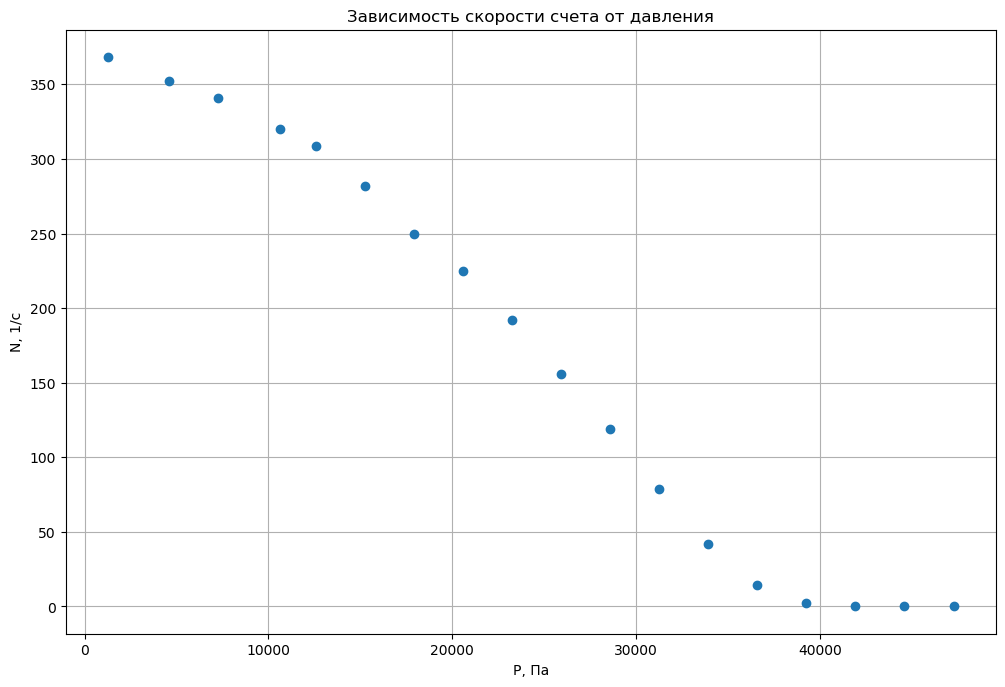

In [13]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x21, y21, 'o' ,label= "Всё")
ax1.grid(True)
plt.xlabel("P, Па")
plt.ylabel("N, 1/с")
plt.title("Зависимость скорости счета от давления")
plt.show()

In [14]:
#Экстраполируем по точкам где наблюдается снижение.
x22 = x21[3:-4]
y22 = y21[3:-4]
a, b = np.polyfit(x22,y22,1)
s = 0
for i in range(len(y22)):
    s+= (abs(y22[i] - (a*x22[i]) - b))**2
s = (s/len(y22))**0.5

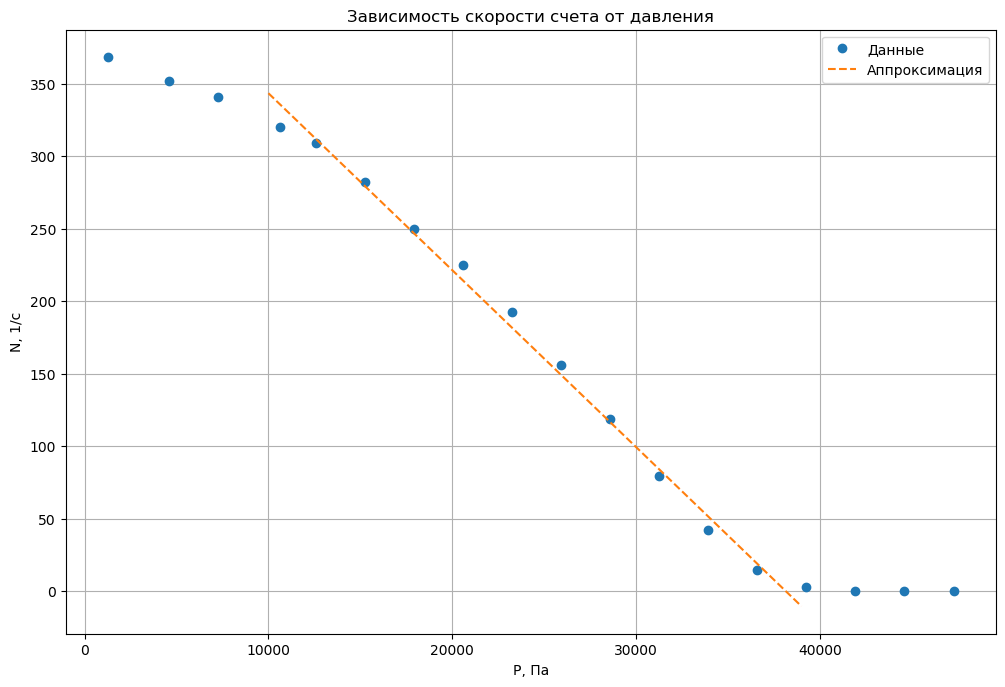

In [15]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x21, y21, 'o' ,label= "Данные")
ax1.grid(True)
ap = [i for i in range(10000, 40000, 1000)]
p = [a*i + b for i in ap]
ax1.plot(ap, p, "--", label= "Аппроксимация")
ax1.legend()
plt.xlabel("P, Па")
plt.ylabel("N, 1/c")
plt.title("Зависимость скорости счета от давления")
plt.show()

In [16]:
p_av =(x22[0] + x22[-1])/2
p2 = -b/a
r2_av = (p_av/101330)*9
r2_av1 = r2_av * 0.001225
r2 = (p2/101330)*9
r21 = r2*0.001225
err2 = ((5/400)**2 + (s/y22[0])**2)**0.5
r2_av_err  = r2_av*err2
r2_av1_err  = r2_av1*err2
r2_err = r2*err2
r21_err = r21*err2

In [17]:
print("Средний пробег: ", round(r2_av,3) , "+-", round(r2_av_err,3) , "см")
print("Средний пробег: ", round(r2_av1,4), "+-", round(r2_av1_err,4) , "г/см^2")
print("Экстраполированный пробег: ", round(r2,3) , "+-", round(r2_err,3) , "см")
print("Экстраполированный пробег: ", round(r21,4) , "+-", round(r21_err,4) , "г/см^2")

Средний пробег:  2.097 +- 0.058 см
Средний пробег:  0.0026 +- 0.0001 г/см^2
Экстраполированный пробег:  3.388 +- 0.094 см
Экстраполированный пробег:  0.0041 +- 0.0001 г/см^2


3\. Используя результаты предыдущих экспериментов, определим толщину слюды

In [18]:
r = (r21 - r11)*1.2*1000
print("Пробег в слюде:", r, "мг/cм^2")

Пробег в слюде: 2.1137639919748676 мг/cм^2


4\. Вычислим энергию $\alpha$-частиц и кол-во вещества в препарате

$R = 0.32E^{3/2}$

In [19]:
E_a2 = (r2/0.32)**(2/3)
E_a2_err = E_a2*err2
print("Энергия a-частиц: ", round(E_a2,3) , "+-", round(E_a2_err,3) , "МэВ")

Энергия a-частиц:  4.821 +- 0.134 МэВ


Это близко к табличному значению 5.15 МэВ

In [20]:
N_a = 6.022*(10**23)
l = np.log(2)/(2.44*(10**4)*365*24*60*60)
N = y2[0]*((4*np.pi)/0.04)
N0 = N/(1-np.e**(-l))
V = N0/N_a
M = V*239*1000
print("Кол-во вещества: ", round(V,9), "моль")
print("Масса вещества: ", round(M,3) , "мг")

Кол-во вещества:  2.128e-06 моль
Масса вещества:  0.509 мг


## 3. Определение пробега $\alpha$-частиц с помощью ионизационной камеры

1\. Подготовили установку к работе. Измеряем зависимоть силы тока через камеру от давления, заносим данные в таблицу.

In [21]:
table3 = pd.read_csv('''C:\\Users\\Nikeyson-PC\\Desktop\\Laba4_1\\exp3.csv''', sep=';')

In [22]:
table3

,Pressure,I
0,740,8
1,720,34
2,700,61
3,680,88
4,660,113
5,640,142
6,620,167
7,600,200
8,580,229
9,560,257


In [23]:
x3 = np.array(table3.iloc[:, 0])
y3 = np.array(table3.iloc[:, 1])
x3 = 100600 - x3*133.322

2\. Строим график, по нему определим среднюю и экстраполированную длину пробега

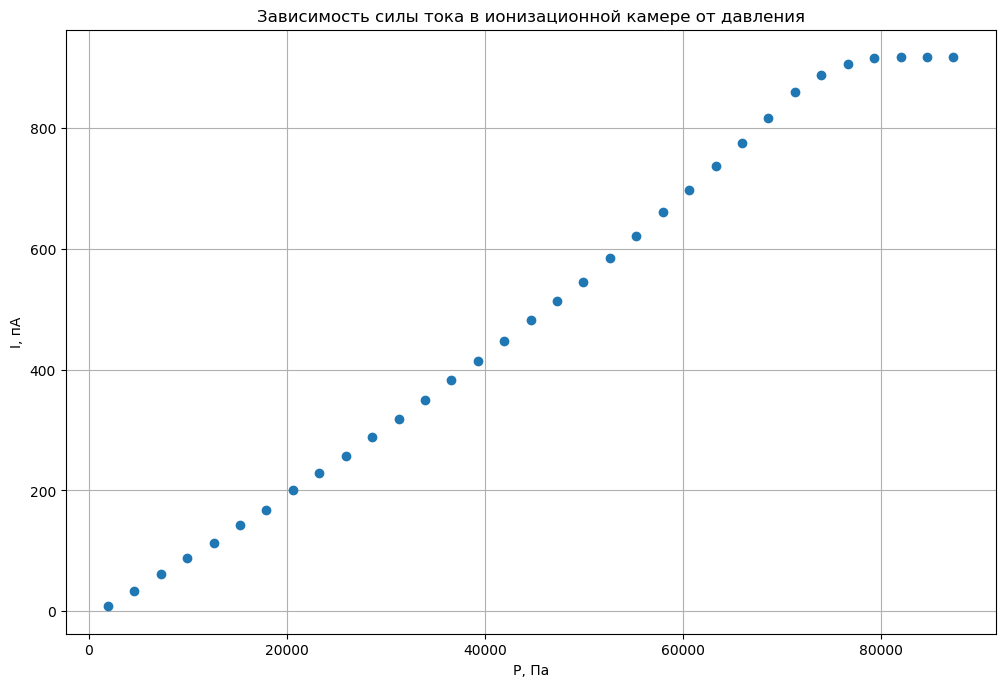

In [24]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x3, y3, 'o' ,label= "Всё")
ax1.grid(True)
plt.xlabel("P, Па")
plt.ylabel("I, пА")
plt.title("Зависимость силы тока в ионизационной камере от давления")
plt.show()

In [25]:
#Экстраполируем
x31 = x3[-4:]
y31 = y3[-4:]
x32 = x3[6:-6]
y32 = y3[6:-6]
a1, b1 = np.polyfit(x31,y31,1)
a2, b2 = np.polyfit(x32,y32,1)
s = 0
for i in range(len(y31)):
    s+= (abs(y31[i] - (a1*x31[i]) - b1))**2
for i in range(len(y32)):
    s+= (abs(y32[i] - (a2*x32[i]) - b2))**2
s = (s/(len(y31)+len(y32)))**0.5

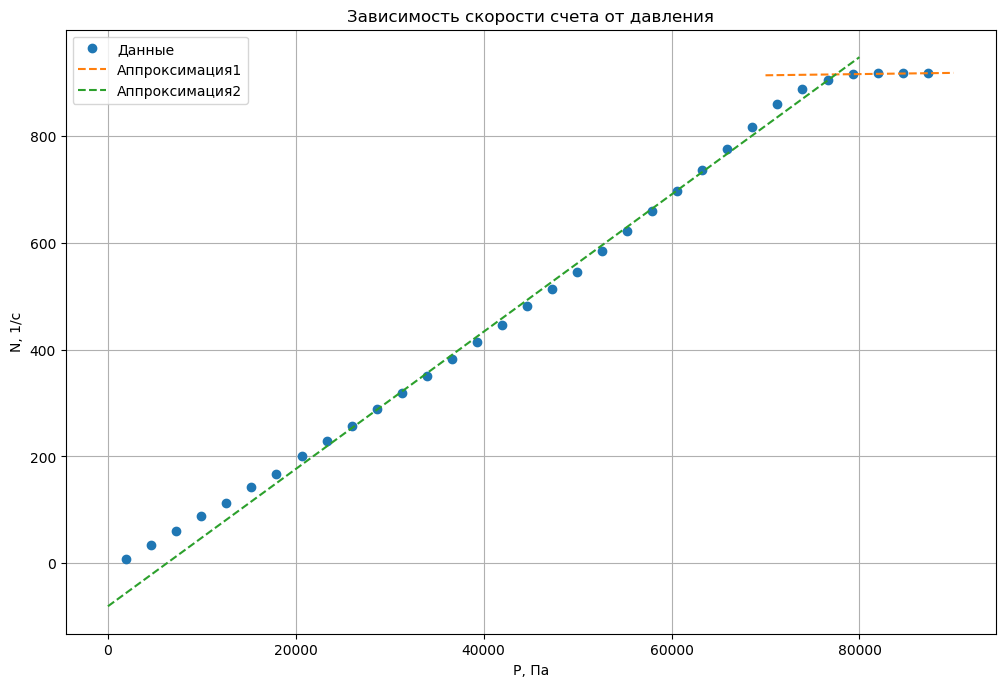

In [26]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x3, y3, 'o' ,label= "Данные")
ax1.grid(True)
ap1 = [i for i in range(70000, 100000, 10000)]
p1 = [a1*i + b1 for i in ap1]
ax1.plot(ap1, p1, "--", label= "Аппроксимация1")
ap2 = [i for i in range(0, 90000, 10000)]
p2 = [a2*i + b2 for i in ap2]
ax1.plot(ap2, p2, "--", label= "Аппроксимация2")
ax1.legend()
plt.xlabel("P, Па")
plt.ylabel("N, 1/c")
plt.title("Зависимость скорости счета от давления")
plt.show()

In [27]:
P0 = (b2-b1)/(a1-a2)
r3 = (P0/101330)*5
r31 = r3*0.001225
err3 = ((5/400)**2 + (s/y31[-1])**2)**0.5
r3_err = r3*err3
r31_err = r31*err3
print("Экстраполированный пробег: ", round(r3,3) , "+-", round(r3_err,3) , "см")
print("Экстраполированный пробег: ", round(r31,4) , "+-", round(r31_err,4) , "г/см^2")

Экстраполированный пробег:  3.824 +- 0.064 см
Экстраполированный пробег:  0.0047 +- 0.0001 г/см^2


3\. Вычислим энергию $\alpha$-частиц

In [28]:
E_a3 = (r3/0.32)**(2/3)
E_a3_err = E_a3*err3
print("Энергия a-частиц: ", round(E_a3,3) , "+-", round(E_a3_err,3) , "МэВ")

Энергия a-частиц:  5.227 +- 0.088 МэВ


Это близко к табличному значению 5.15 МэВ

4\. По полученным данным, расчитаем, какой толщины должен быть листок бумаги, чтобы не пропустить данное $\alpha$-излучение

In [29]:
#Плотность воздуха: 0.001225 г/см^3; плотность бумаги: 0.8 г/см^3, откуда:
Rpap = ((r3+r2)/2)*(0.001225/0.8)*10
print("Толщина бумаги:", round(Rpap,3), "мм")

Толщина бумаги: 0.055 мм


Обычная офисная бумага имеет толщину 0.1 мм - она не пропустит $\alpha$-излучение

## Вывод

Определили энергию $\alpha$-частиц по величине их пробега в воздухе, самым точным методом измерений оказалась ионизационная камера